<h1><center>DWDM PROJECT<center><h1>
<h3><center> A Comparison of Three Classification Algorithms 
for Handwritten Digit Recognition<h3>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sn

In [2]:
#importing the dataset
mnist = tf.keras.datasets.mnist
#loading datasets into train and test sets
(x_train, y_train),(x_test, y_test) = mnist.load_data() 

In [3]:
print(len(x_train)) #size of training data
print(len(x_test)) #size of test data

60000
10000


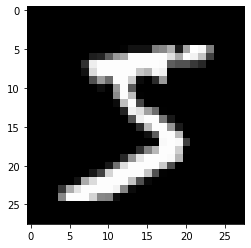

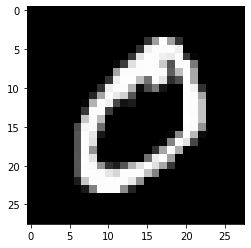

In [4]:
#plotting first two images of the digits dataset in grayscale
for i in (0,1):
    plt.imshow(x_train[i], cmap="gray")# Import the image
    plt.show() # Plot the image

In [5]:
#printing their actual value
print(y_train[0],y_train[1])

5 0


In [6]:
#concatenating train and test to select random subset of 46080 images
x_train = np.concatenate((x_train,x_test))
y_train = np.concatenate((y_train,y_test))

In [7]:
print(x_train.dtype,y_train.dtype) #datatype
print(x_train.shape,y_train.shape) #shape

uint8 uint8
(70000, 28, 28) (70000,)


In [8]:
#selecting 46080 random images from 70000
n_data = len(x_train)
idx = np.arange(n_data) 
np.random.shuffle(idx) 
x_train = x_train[idx[:46080],:] 
y_train = y_train[idx[:46080]]
print(x_train.shape)
print(y_train.shape)

(46080, 28, 28)
(46080,)


In [9]:
#expanding dimension 46080*28*28 to 46080*28*28*1 to apply resize 
x_train = np.expand_dims(x_train, axis=-1)
#resizing image of size 28*28 to 16*16
x_train = tf.image.resize(x_train, [16,16]) 

In [10]:
print(x_train.shape)
print(y_train.shape)

(46080, 16, 16, 1)
(46080,)


In [11]:
#squeezing back to dimension 46080*16*16
x_train = np.squeeze(x_train,axis=3)
print(x_train.shape)

(46080, 16, 16)


In [12]:
#converting to binary image
#threshold, upper, lower = 127, 1, 0
#x_train=np.where(x_train>threshold, upper, lower)
#normalizing values to 0-1
x_train=x_train/255

In [13]:
#flattening the dataset into a single array
x_train=x_train.reshape(len(x_train),256)
print(x_train.shape)

(46080, 256)


In [14]:
#selecting top 175 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_train= SelectKBest(chi2, k=175).fit(x_train, y_train).transform(x_train)
print(x_train.shape)
x_train

(46080, 175)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18860294, 0.24632353,
        0.00183824],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

## Multilayer Perceptron (MLP)

*Multilayer Perceptron (MLP) is a type of feed forward neural network (NN). MLP consists of three layers. The input layer, the 
hidden layer, and the output layer.It uses back propagation technique for training. In this work the 
input layer consists of 37nodes. The second layer which is the hidden layer consist of 20 fully connect nodes with the input layer. This means the total number of hidden layer’s weights is 740. The third layer contains 10 fully connected output nodes
(digits 0-9) which have 200 weights.*

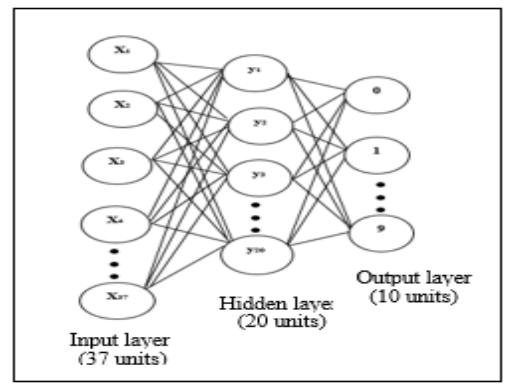

In [15]:
from IPython.display import Image
Image(filename='dwdm.png')

In [16]:
import keras
#Simple Neural Network
#sequential means stack of layers in neural network
#dense means every neuron is connected to every other neuron
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
#applying 10 fold cross validation
k = 10
kf = KFold(n_splits=k, random_state=None)

model1=keras.Sequential([
keras.layers.Dense(20,input_shape=(175,),activation='relu'),
keras.layers.Dense(10, activation='sigmoid')])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


acc_score1 = []
predicted1 = np.array([])
 
for train_index , test_index in kf.split(x_train):
  
    
    x_train_split , x_test_split = x_train[train_index,:],x_train[test_index,:]
    y_train_split , y_test_split = y_train[train_index] , y_train[test_index]
    
    model1.fit(x_train_split,y_train_split,epochs=10)
    model1.evaluate(x_test_split,y_test_split,verbose=0)
    y_predicted=model1.predict(x_test_split)
    predicted1 = np.append(predicted1,np.argmax(y_predicted,axis=1))

    acc = accuracy_score( y_test_split,np.argmax(y_predicted, axis = 1))
    acc_score1.append(acc*100)
    
     
avg_acc_score1 = sum(acc_score1)/k
 
print('accuracy of each fold - {}'.format(acc_score1))
print('Avg accuracy : {}'.format(avg_acc_score1))

Epoch 1/10
1296/1296 [==============================] - 1s 731us/step - loss: 0.6721 - accuracy: 0.8222
Epoch 2/10
1296/1296 [==============================] - 1s 716us/step - loss: 0.3197 - accuracy: 0.9112
Epoch 3/10
1296/1296 [==============================] - 1s 862us/step - loss: 0.2840 - accuracy: 0.9211
Epoch 4/10
1296/1296 [==============================] - 1s 762us/step - loss: 0.2614 - accuracy: 0.9267
Epoch 5/10
1296/1296 [==============================] - 1s 807us/step - loss: 0.2439 - accuracy: 0.9307
Epoch 6/10
1296/1296 [==============================] - 1s 790us/step - loss: 0.2289 - accuracy: 0.9348
Epoch 7/10
1296/1296 [==============================] - 1s 747us/step - loss: 0.2166 - accuracy: 0.9385
Epoch 8/10
1296/1296 [==============================] - 1s 840us/step - loss: 0.2061 - accuracy: 0.9411
Epoch 9/10
1296/1296 [==============================] - 1s 753us/step - loss: 0.1984 - accuracy: 0.9425
Epoch 10/10
1296/1296 [==============================] - 1s 724u

1296/1296 [==============================] - 1s 816us/step - loss: 0.0879 - accuracy: 0.9740
Epoch 10/10
1296/1296 [==============================] - 1s 737us/step - loss: 0.0874 - accuracy: 0.9740
Epoch 1/10
1296/1296 [==============================] - 1s 665us/step - loss: 0.0900 - accuracy: 0.9735
Epoch 2/10
1296/1296 [==============================] - 1s 635us/step - loss: 0.0885 - accuracy: 0.9743
Epoch 3/10
1296/1296 [==============================] - 1s 644us/step - loss: 0.0878 - accuracy: 0.9741
Epoch 4/10
1296/1296 [==============================] - 1s 640us/step - loss: 0.0875 - accuracy: 0.9738
Epoch 5/10
1296/1296 [==============================] - 1s 748us/step - loss: 0.0867 - accuracy: 0.9738
Epoch 6/10
1296/1296 [==============================] - 1s 630us/step - loss: 0.0859 - accuracy: 0.9751
Epoch 7/10
1296/1296 [==============================] - 1s 633us/step - loss: 0.0851 - accuracy: 0.9748
Epoch 8/10
1296/1296 [==============================] - 1s 656us/step - lo

Text(69.0, 0.5, 'Truth')

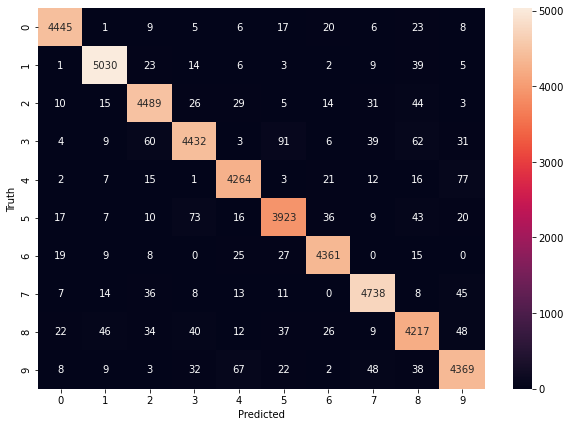

In [17]:
#generating confusion matrix for MLP
cm1=tf.math.confusion_matrix(y_train,predicted1)

#plotting the Confusion matrix for MLP
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [18]:
# ACCURACY OF THE MLP MODEL
from sklearn import metrics
metrics.accuracy_score(y_train,predicted1)*100

96.06770833333333

## Naïve Bayes

*Bayesian classifiers(BC) are regulated measurable classifiers. They are used to predict the class enrollment probabilities which are the likelihood that an instance has probability belonging to a specific class.The Naïve Bayes relies upon the assumption of independence of variables within the class.The estimation of standard deviation σy and the mean µy are 
calculated from training data.If whole feature follows a normal distribution, the probability of attribute is given by:*

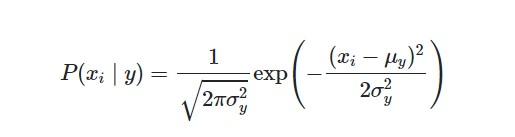

In [19]:
from IPython.display import Image
Image(filename='dwdm2.jpg')

In [20]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB()

 
acc_score2 = []
predicted2 = np.array([])
 
for train_index , test_index in kf.split(x_train):
    x_train_split , x_test_split = x_train[train_index,:],x_train[test_index,:]
    y_train_split , y_test_split = y_train[train_index] , y_train[test_index]
     
    model2.fit(x_train_split,y_train_split)
    y_predicted = model2.predict(x_test_split)
    predicted2 = np.append(predicted2,y_predicted)
    
     
    acc = accuracy_score(y_predicted, y_test_split)*100
    acc_score2.append(acc)
     
avg_acc_score2 = sum(acc_score2)/k
 
print('accuracy of each fold - {}'.format(acc_score2))
print('Avg accuracy : {}'.format(avg_acc_score2))

accuracy of each fold - [80.6640625, 80.16493055555556, 79.296875, 81.07638888888889, 81.27170138888889, 80.20833333333334, 80.12152777777779, 80.36024305555556, 80.05642361111111, 79.86111111111111]
Avg accuracy : 80.30815972222223


Text(69.0, 0.5, 'Truth')

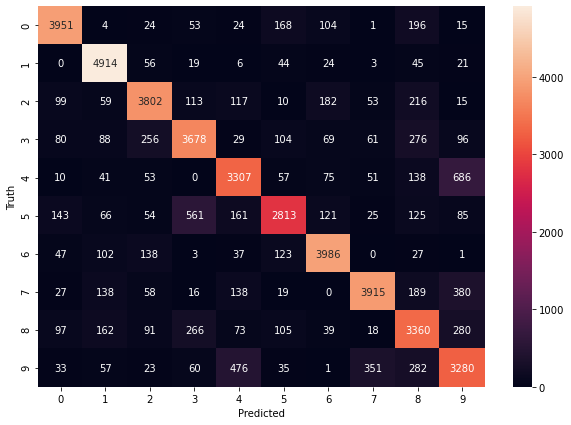

In [21]:
#generating confusion matrix for NB
cm2=tf.math.confusion_matrix(y_train,predicted2)

#plotting the Confusion matrix for NB
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
#ACCURACY MEASURE OF NAIVE BAYES
from sklearn import metrics
metrics.accuracy_score(y_train,predicted2)*100

80.30815972222223

## k-Nearest Neighbors

*KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification).It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.*

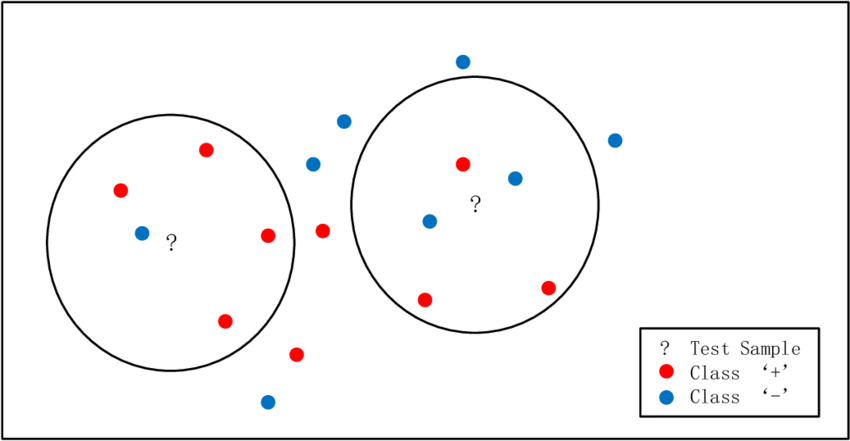

In [23]:
from IPython.display import Image
Image(filename='KNN.png')

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(7)

acc_score3 = []
predicted3 = np.array([])
 
for train_index , test_index in kf.split(x_train):
  
    
    x_train_split , x_test_split = x_train[train_index,:],x_train[test_index,:]
    y_train_split , y_test_split = y_train[train_index] , y_train[test_index]
    
    model3.fit(x_train_split, y_train_split)
    y_predicted = model3.predict(x_test_split)
    predicted3 = np.append(predicted3,y_predicted)
    
     
    acc = accuracy_score(y_predicted, y_test_split)*100
    acc_score3.append(acc)
    
     
avg_acc_score3 = sum(acc_score3)/k
 
print('accuracy of each fold - {}'.format(acc_score3))
print('Avg accuracy : {}'.format(avg_acc_score3))



accuracy of each fold - [97.20052083333334, 96.83159722222221, 97.17881944444444, 97.30902777777779, 96.80989583333334, 96.76649305555556, 97.13541666666666, 96.72309027777779, 97.02690972222221, 97.13541666666666]
Avg accuracy : 97.01171874999999


Text(69.0, 0.5, 'Truth')

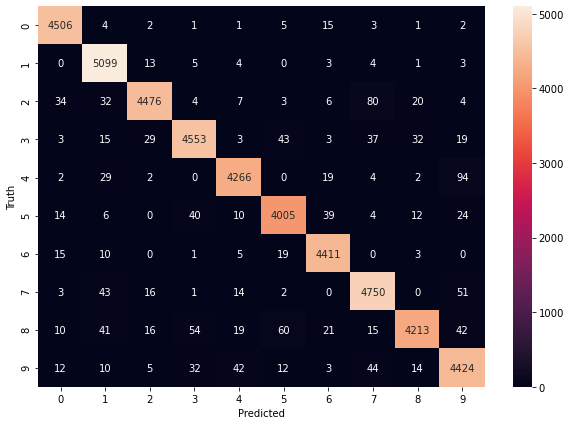

In [25]:
#generating confusion matrix for KNN
cm3=tf.math.confusion_matrix(y_train,predicted3)

#plotting the Confusion matrix for KNN
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
#ACCURACY MEASURE OF k-NEAREST NEIGHBORS
from sklearn import metrics
metrics.accuracy_score(y_train,predicted3)*100

97.01171875

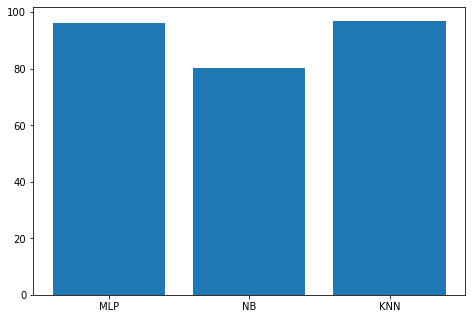

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Classifiers = ['MLP', 'NB', 'KNN']
Accuracy= [avg_acc_score1,avg_acc_score2,avg_acc_score3]
ax.bar(Classifiers,Accuracy)
plt.show()

In [28]:
from sklearn.metrics import classification_report
labels = ['class 0','class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print("--------------------MLP--------------------")
print(classification_report(y_train,predicted1, target_names=labels))
print("--------------------NB--------------------")
print(classification_report(y_train,predicted2, target_names=labels))
print("--------------------KNN--------------------")
print(classification_report(y_train,predicted3, target_names=labels))


--------------------MLP--------------------
              precision    recall  f1-score   support

     class 0       0.98      0.98      0.98      4540
     class 1       0.98      0.98      0.98      5132
     class 2       0.96      0.96      0.96      4666
     class 3       0.96      0.94      0.95      4737
     class 4       0.96      0.97      0.96      4418
     class 5       0.95      0.94      0.95      4154
     class 6       0.97      0.98      0.97      4464
     class 7       0.97      0.97      0.97      4880
     class 8       0.94      0.94      0.94      4491
     class 9       0.95      0.95      0.95      4598

    accuracy                           0.96     46080
   macro avg       0.96      0.96      0.96     46080
weighted avg       0.96      0.96      0.96     46080

--------------------NB--------------------
              precision    recall  f1-score   support

     class 0       0.88      0.87      0.88      4540
     class 1       0.87      0.96      0.91  

<h3>CONCLUSION</h3>

<b>The comparison between three classification algorithms, 
Naive Bayes, MLP and KNN has been done for the 
recognition of the MNIST handwritten digits. After performing an evaluation for each 
classifier on 46080 instances with 10-fold cross-validation for 
each, KNN presents the highest accuracy of 97.01% 
compared to NB 80.31%, and MLP 96.06%. In this comparison 
method MLP and KNN work equally good in classifying 
handwritten digits compared to the NB classifier.</b>